#  MAJOR PROJECT :- BUILD A NEURAL NETWORK TO CLASSIFY "MASK" AND "WITHOUT_ MASK" IMAGES 

In [1]:
import cv2

In [2]:
import os

In [3]:
import numpy as np

In [4]:
import tensorflow as tf

In [5]:

path=r'C:/Users/pranay/Desktop/Masks/'
Folder_name=os.listdir(path)
labels=[i for i in range(len(Folder_name))]
label_dict=dict(zip(Folder_name,labels))
print(Folder_name)
print(labels)
print(label_dict)

['without_mask', 'with_mask']
[0, 1]
{'without_mask': 0, 'with_mask': 1}


In [6]:
h=32
w=32
features=[]
target=[]
for i in Folder_name:
    folder_path=os.path.join(path,i)
    img_names=os.listdir(folder_path)
    
    for j in img_names:
        img_path=os.path.join(folder_path,j)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(h,w))
            features.append(resized)
            target.append(label_dict[i])
            
        except Exception as e:
            print("Exception occured",e)

In [7]:
features=np.array(features)/255.0
features=np.reshape(features,(features.shape[0],h,w,1))
target=np.array(target)


In [8]:
features.shape


(1376, 32, 32, 1)

In [9]:
target.shape

(1376,)

# Split the data into training and testing

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_features,test_features,train_target,test_target=train_test_split(features,target,test_size=0.2)

In [12]:
train_features.shape

(1100, 32, 32, 1)

# Image Augmentation Techniques
### 1. Rotation
### 2. Width Shifting
### 3. Height Shifting
### 4. Shearing
### 5. Zoom

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.2)

In [15]:
dataGen.fit(train_features)

In [16]:
id=dataGen.flow(train_features,train_target,batch_size=20)

In [17]:
x_batch,y_batch=next(id)

In [18]:
x_batch.shape

(20, 32, 32, 1)

In [19]:
import matplotlib.pyplot as plt

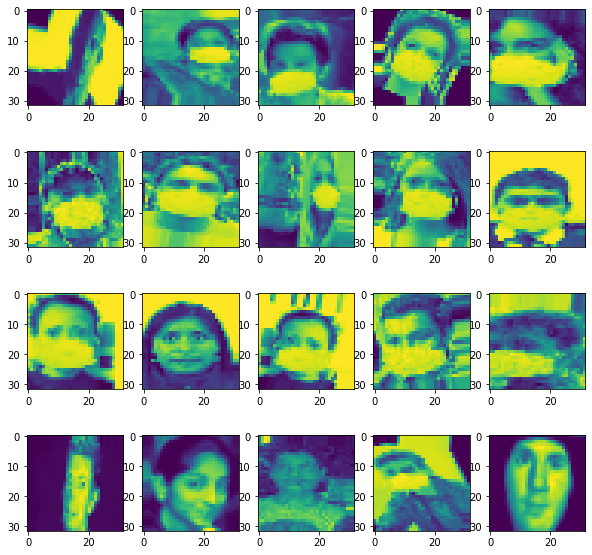

In [20]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_batch[i].reshape(32,32))
plt.show()

# Since the target column has finite set of possibilities ,we have to build classification model.
    1.Increase the number of neurons in output layer(One-Hot Encoding Technique)
    2.Convert the values in neurons of output layer to probability values(Using activation function-softmax)       

In [21]:
from tensorflow.keras.utils import to_categorical
train_target=to_categorical(train_target)

In [22]:
train_target.shape

(1100, 2)

# STEP 1: SPECIFY THE ARCHITECTURE

In [23]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
model=Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(32,32,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))


# STEP 2: COMPILE THE MODEL

In [26]:
from tensorflow.keras.optimizers import Adam


In [27]:
model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=["accuracy"])

# STEP 3: TRAIN THE MODEL ON THE TRAINING DATASET

In [28]:
model.fit_generator(dataGen.flow(train_features,train_target,batch_size=20),epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
55/55 [==============================] - 4s 67ms/step - loss: 0.6528 - accuracy: 0.5964
Epoch 2/20
55/55 [==============================] - 4s 67ms/step - loss: 0.4202 - accuracy: 0.8155
Epoch 3/20
55/55 [==============================] - 4s 68ms/step - loss: 0.2606 - accuracy: 0.8964
Epoch 4/20
55/55 [==============================] - 4s 68ms/step - loss: 0.2198 - accuracy: 0.9127
Epoch 5/20
55/55 [==============================] - 4s 68ms/step - loss: 0.1804 - accuracy: 0.9336
Epoch 6/20
55/55 [==============================] - 4s 68ms/step - loss: 0.1698 - accuracy: 0.9436
Epoch 7/20
55/55 [==============================] - 4s 68ms/step - loss: 0.1637 - accuracy: 0.9436
Epoch 8/20
55/55 [==============================] - 4s 69ms/step - loss: 0.1329 - accuracy: 0.9509
Epoch 9/20
55/55 [==============================] - 4s 70ms/step - loss: 0.1113 - accuracy: 0.9636
Epoch 10/20
55/55 [==============

In [30]:
from tensorflow.keras.models import model_from_json

In [31]:
file=open('C:/Users/pranay/Desktop/MasksTest.json',"w")
model_json=model.to_json()
file.write(model_json)
file.close()

In [32]:
model.save_weights('C:/Users/pranay/Desktop/MasksTestWeight.h5')

In [33]:
file=open('C:/Users/pranay/Desktop/MasksTest.json','r')
loaded_model_json=file.read()
loaded_model=model_from_json(loaded_model_json)

In [34]:
loaded_model.load_weights('C:/Users/pranay/Desktop/MasksTestWeight.h5')

# STEP 4:TEST THE MODEL BY USING IT FOR PREDICTIONS

In [35]:
face_clsfr=cv2.CascadeClassifier('C:/Users/pranay/Desktop/haarcascade_frontalface_default.xml')

In [36]:
cap=cv2.VideoCapture(0)


In [37]:
labels_dict={0:'non-masked',1:'masked'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [38]:
while True:
    message,pixels=cap.read()
    gray=cv2.cvtColor(pixels,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)
    for x,y,w,h in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(32,32))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,32,32,1))
        result=loaded_model.predict(reshaped)
        
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(pixels,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(pixels,(x,y-30),(x+w,y),color_dict[label],-1)
        cv2.putText(pixels,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('PREDICTIONS',pixels)
    characterAscii=cv2.waitKey(1)
    if characterAscii==ord("p"):
        cv2.destroyAllWindows()
        break
      